<a href="https://colab.research.google.com/github/fadillalillianhoud/Malaria-Analysis/blob/main/Malaria_Epidemiology_in_Ghana_and_Nigeria_An_Exploratory_Data_Analysis_Project_Fadilla_Houd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook analyzes the factors influencing malaria incidence in Ghana and Nigeria using a dataset from Kaggle. The analysis includes exploring relevant variables, performing country-specific analysis for Ghana and Nigeria, and summarizing the findings.

## Data Loading
First, we will download the dataset from Kaggle and load it into a pandas DataFrame for analysis.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"houdlillianmaltiti","key":"2b1858ff226432594e8eb69982a606bd"}'}

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lydia70/malaria-in-africa")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/malaria-in-africa


In [ ]:
!pip install kagglehub

In [ ]:
!kaggle --version

Kaggle API 1.7.4.5


Before loading the data, let's check the files available in the downloaded directory to confirm the CSV file name.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(path))

['DatasetAfricaMalaria.csv']


Now we load the dataset into a pandas DataFrame. We'll also display the first few rows to get a glimpse of the data structure and content.

In [ ]:
import pandas as pd
import os

# Assuming the dataset contains a CSV file, you might need to adjust the filename.
# You can list the files in the downloaded directory to find the correct filename.
# For example:
# print(os.listdir(path))

# Replace 'malaria_data.csv' with the actual name of the CSV file in the dataset
csv_file_path = os.path.join(path, 'DatasetAfricaMalaria.csv') # Replace 'malaria_data.csv'

# Check if the file exists before trying to read it
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    display(df.head())
else:
    print(f"Error: The file {csv_file_path} was not found.")
    print("Please check the 'path' variable and the contents of the downloaded directory.")
    print("You can use `os.listdir(path)` to see the files in the directory.")

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


## Data Cleaning
We will filter the dataset to include only data for Ghana and Nigeria, as the analysis focuses on these two countries.

In [ ]:
df_filtered = df[df['Country Name'].isin(['Ghana', 'Nigeria'])]
display(df_filtered.head())

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
22,Ghana,2007,GHA,322.33,476484.0,NaN,NaN,NaN,21.10,3.86,...,3.99,71.35,59.83,83.50,12.12,6.94,17.58,7.946527,-1.023194,POINT (7.946527 -1.023194)
38,Nigeria,2007,NGA,421.33,0.0,NaN,NaN,2.0,17.57,13.18,...,4.80,57.64,43.30,78.44,32.53,29.78,36.51,9.081999,8.675277,POINT (9.081999 8.675276999999999)
76,Ghana,2008,GHA,333.72,1094483.0,28.0,43.0,28.0,22.50,4.54,...,3.97,72.35,60.62,84.39,12.72,7.40,18.18,7.946527,-1.023194,POINT (7.946527 -1.023194)
92,Nigeria,2008,NGA,424.66,143079.0,6.0,33.2,3.2,17.85,13.45,...,4.79,59.03,44.52,79.32,33.10,29.89,37.59,9.081999,8.675277,POINT (9.081999 8.675276999999999)
130,Ghana,2009,GHA,351.39,1104370.0,NaN,NaN,NaN,23.93,5.23,...,3.91,73.36,61.41,85.29,13.33,7.87,18.79,7.946527,-1.023194,POINT (7.946527 -1.023194)


Let's check for missing values in the filtered dataset to understand the completeness of the data for each variable.

In [ ]:
display(df_filtered.isnull().sum())

,0
Country Name,0
Year,0
Country Code,0
"Incidence of malaria (per 1,000 population at risk)",0
Malaria cases reported,0
Use of insecticide-treated bed nets (% of under-5 population),11
Children with fever receiving antimalarial drugs (% of children under age 5 with fever),12
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),11
People using safely managed drinking water services (% of population),0
"People using safely managed drinking water services, rural (% of rural population)",0


## Exploratory Analysis
In this section, we will visualize the trends of key variables over time for Ghana and Nigeria.

First, let's plot the malaria incidence over time.

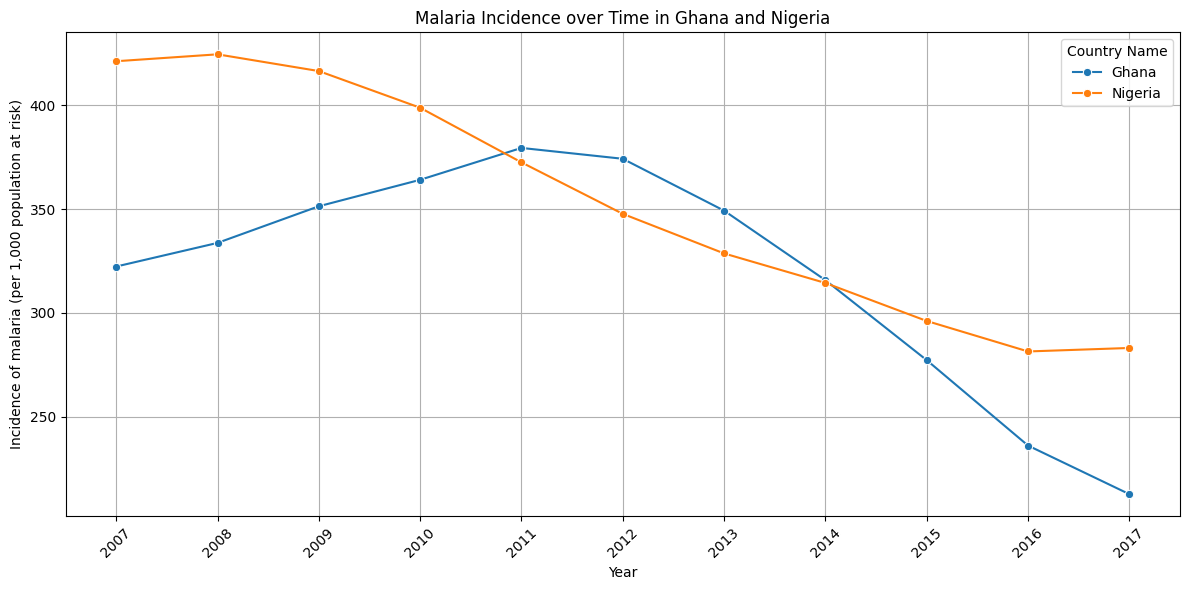

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' column is treated as a categorical variable for plotting
df_filtered = df_filtered.copy() # Create an explicit copy
df_filtered['Year'] = df_filtered['Year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Year', y='Incidence of malaria (per 1,000 population at risk)', hue='Country Name', marker='o')
plt.title('Malaria Incidence over Time in Ghana and Nigeria')
plt.xlabel('Year')
plt.ylabel('Incidence of malaria (per 1,000 population at risk)')
plt.grid(True)
plt.xticks(rotation=44)
plt.tight_layout()
plt.show()

Next, we'll visualize the access to basic sanitation services over time.

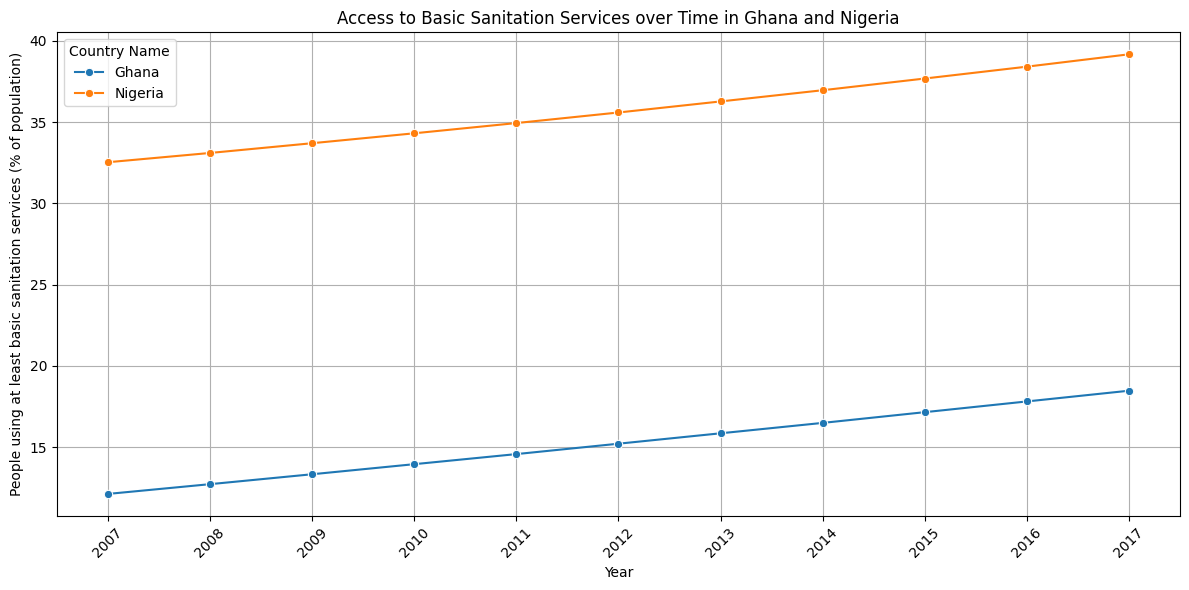

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Year', y='People using at least basic sanitation services (% of population)', hue='Country Name', marker='o')
plt.title('Access to Basic Sanitation Services over Time in Ghana and Nigeria')
plt.xlabel('Year')
plt.ylabel('People using at least basic sanitation services (% of population)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now, let's visualize the use of insecticide-treated bed nets over time.

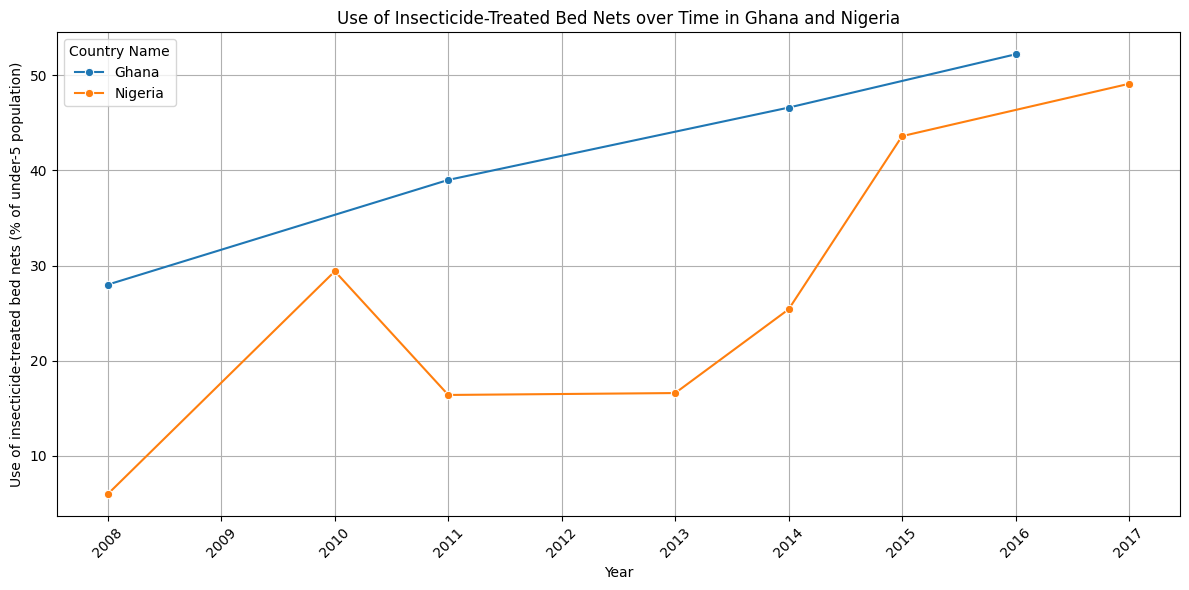

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' column is treated as a categorical variable for plotting
df_filtered_copy = df_filtered.copy() # Create an explicit copy
df_filtered_copy['Year'] = df_filtered_copy['Year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered_copy, x='Year', y='Use of insecticide-treated bed nets (% of under-5 population)', hue='Country Name', marker='o')
plt.title('Use of Insecticide-Treated Bed Nets over Time in Ghana and Nigeria')
plt.xlabel('Year')
plt.ylabel('Use of insecticide-treated bed nets (% of under-5 population)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We will now explore the relationship between malaria incidence and basic sanitation access using a scatter plot.

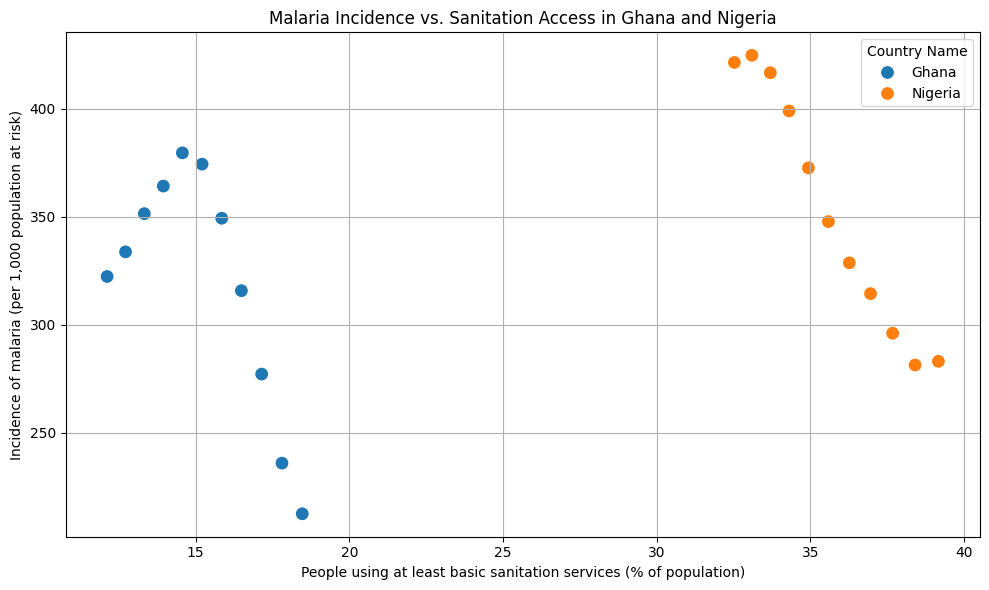

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='People using at least basic sanitation services (% of population)', y='Incidence of malaria (per 1,000 population at risk)', hue='Country Name', s=100)
plt.title('Malaria Incidence vs. Sanitation Access in Ghana and Nigeria')
plt.xlabel('People using at least basic sanitation services (% of population)')
plt.ylabel('Incidence of malaria (per 1,000 population at risk)')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's also visualize the relationship between malaria incidence and bed net usage with a scatter plot.

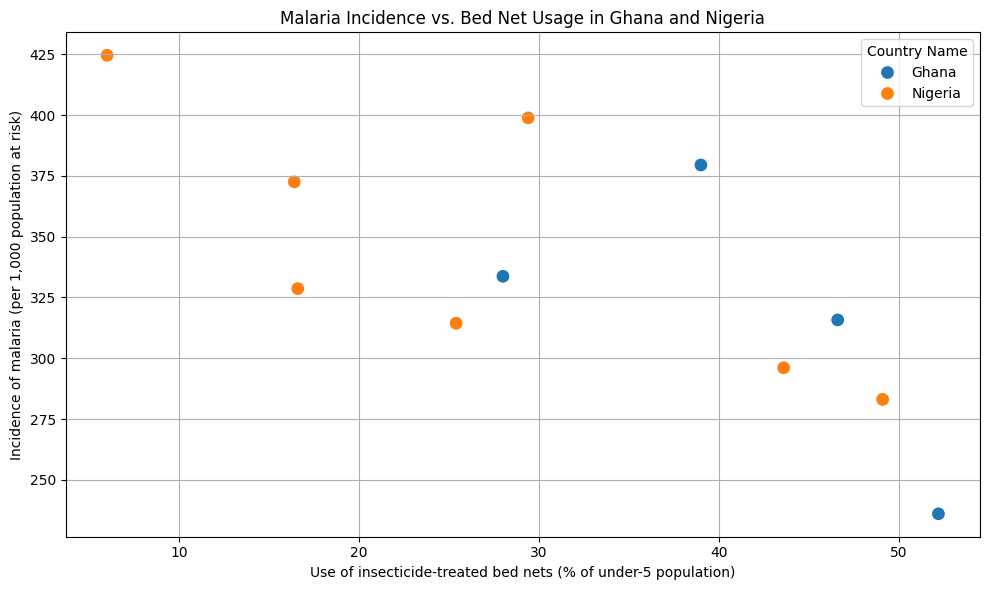

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Use of insecticide-treated bed nets (% of under-5 population)', y='Incidence of malaria (per 1,000 population at risk)', hue='Country Name', s=100)
plt.title('Malaria Incidence vs. Bed Net Usage in Ghana and Nigeria')
plt.xlabel('Use of insecticide-treated bed nets (% of under-5 population)')
plt.ylabel('Incidence of malaria (per 1,000 population at risk)')
plt.grid(True)
plt.tight_layout()
plt.show()

To understand the relationships between numerical variables, we will compute and visualize the correlation matrix.

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)",...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
"Incidence of malaria (per 1,000 population at risk)",1.000000,-0.646508,-0.733095,-0.073557,-0.676337,-0.585055,-0.040166,-0.441472,-0.984551,0.977797,...,-0.719334,0.561679,-0.694480,-0.609313,-0.801331,0.134213,0.234756,0.078695,0.300002,0.300002
Malaria cases reported,-0.646508,1.000000,0.612513,-0.230884,0.275603,0.127603,0.378433,-0.038486,0.841683,-0.889059,...,0.348368,-0.147143,0.313575,0.205586,0.476013,0.303212,0.195935,0.363923,0.150412,0.150412
Use of insecticide-treated bed nets (% of under-5 population),-0.733095,0.612513,1.000000,0.639093,0.737018,0.676975,-0.203169,0.580916,0.826593,-0.844396,...,0.841229,-0.730802,0.825019,0.764656,0.881670,-0.338385,-0.441964,-0.279154,-0.490467,-0.490467
Children with fever receiving antimalarial drugs (% of children under age 5 with fever),-0.073557,-0.230884,0.639093,1.000000,0.644703,0.607413,-0.539516,0.651793,-0.238378,0.268710,...,0.525615,-0.600042,0.539212,0.572141,0.464508,-0.629975,-0.621348,-0.637437,-0.635897,-0.635897
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),-0.676337,0.275603,0.737018,0.644703,1.000000,0.954234,-0.609882,0.940225,0.858965,-0.861188,...,0.928569,-0.964915,0.935681,0.946161,0.888640,-0.771940,-0.836778,-0.726747,-0.877604,-0.877604
People using safely managed drinking water services (% of population),-0.585055,0.127603,0.676975,0.607413,0.954234,1.000000,-0.457492,0.951744,0.999749,-0.989290,...,0.909088,-0.938791,0.909061,0.899180,0.896292,-0.703184,-0.743594,-0.690033,-0.811372,-0.811372
"People using safely managed drinking water services, rural (% of rural population)",-0.040166,0.378433,-0.203169,-0.539516,-0.609882,-0.457492,1.000000,-0.708001,0.999928,-0.990880,...,-0.499430,0.669813,-0.545360,-0.663806,-0.284336,0.951536,0.932897,0.945597,0.889294,0.889294
"People using safely managed drinking water services, urban (% of urban population)",-0.441472,-0.038486,0.580916,0.651793,0.940225,0.951744,-0.708001,1.000000,0.999843,-0.993420,...,0.888304,-0.973555,0.904327,0.938127,0.803801,-0.887223,-0.911289,-0.875965,-0.950157,-0.950157
People using safely managed sanitation services (% of population),-0.984551,0.841683,0.826593,-0.238378,0.858965,0.999749,0.999928,0.999843,1.000000,-0.992159,...,0.999972,-0.977075,0.999947,0.999857,0.999783,0.998390,0.997373,0.999570,NaN,NaN
"People using safely managed sanitation services, rural (% of rural population)",0.977797,-0.889059,-0.844396,0.268710,-0.861188,-0.989290,-0.990880,-0.993420,-0.992159,1.000000,...,-0.992556,0.995514,-0.993205,-0.994015,-0.994456,-0.997614,-0.980622,-0.995341,NaN,NaN


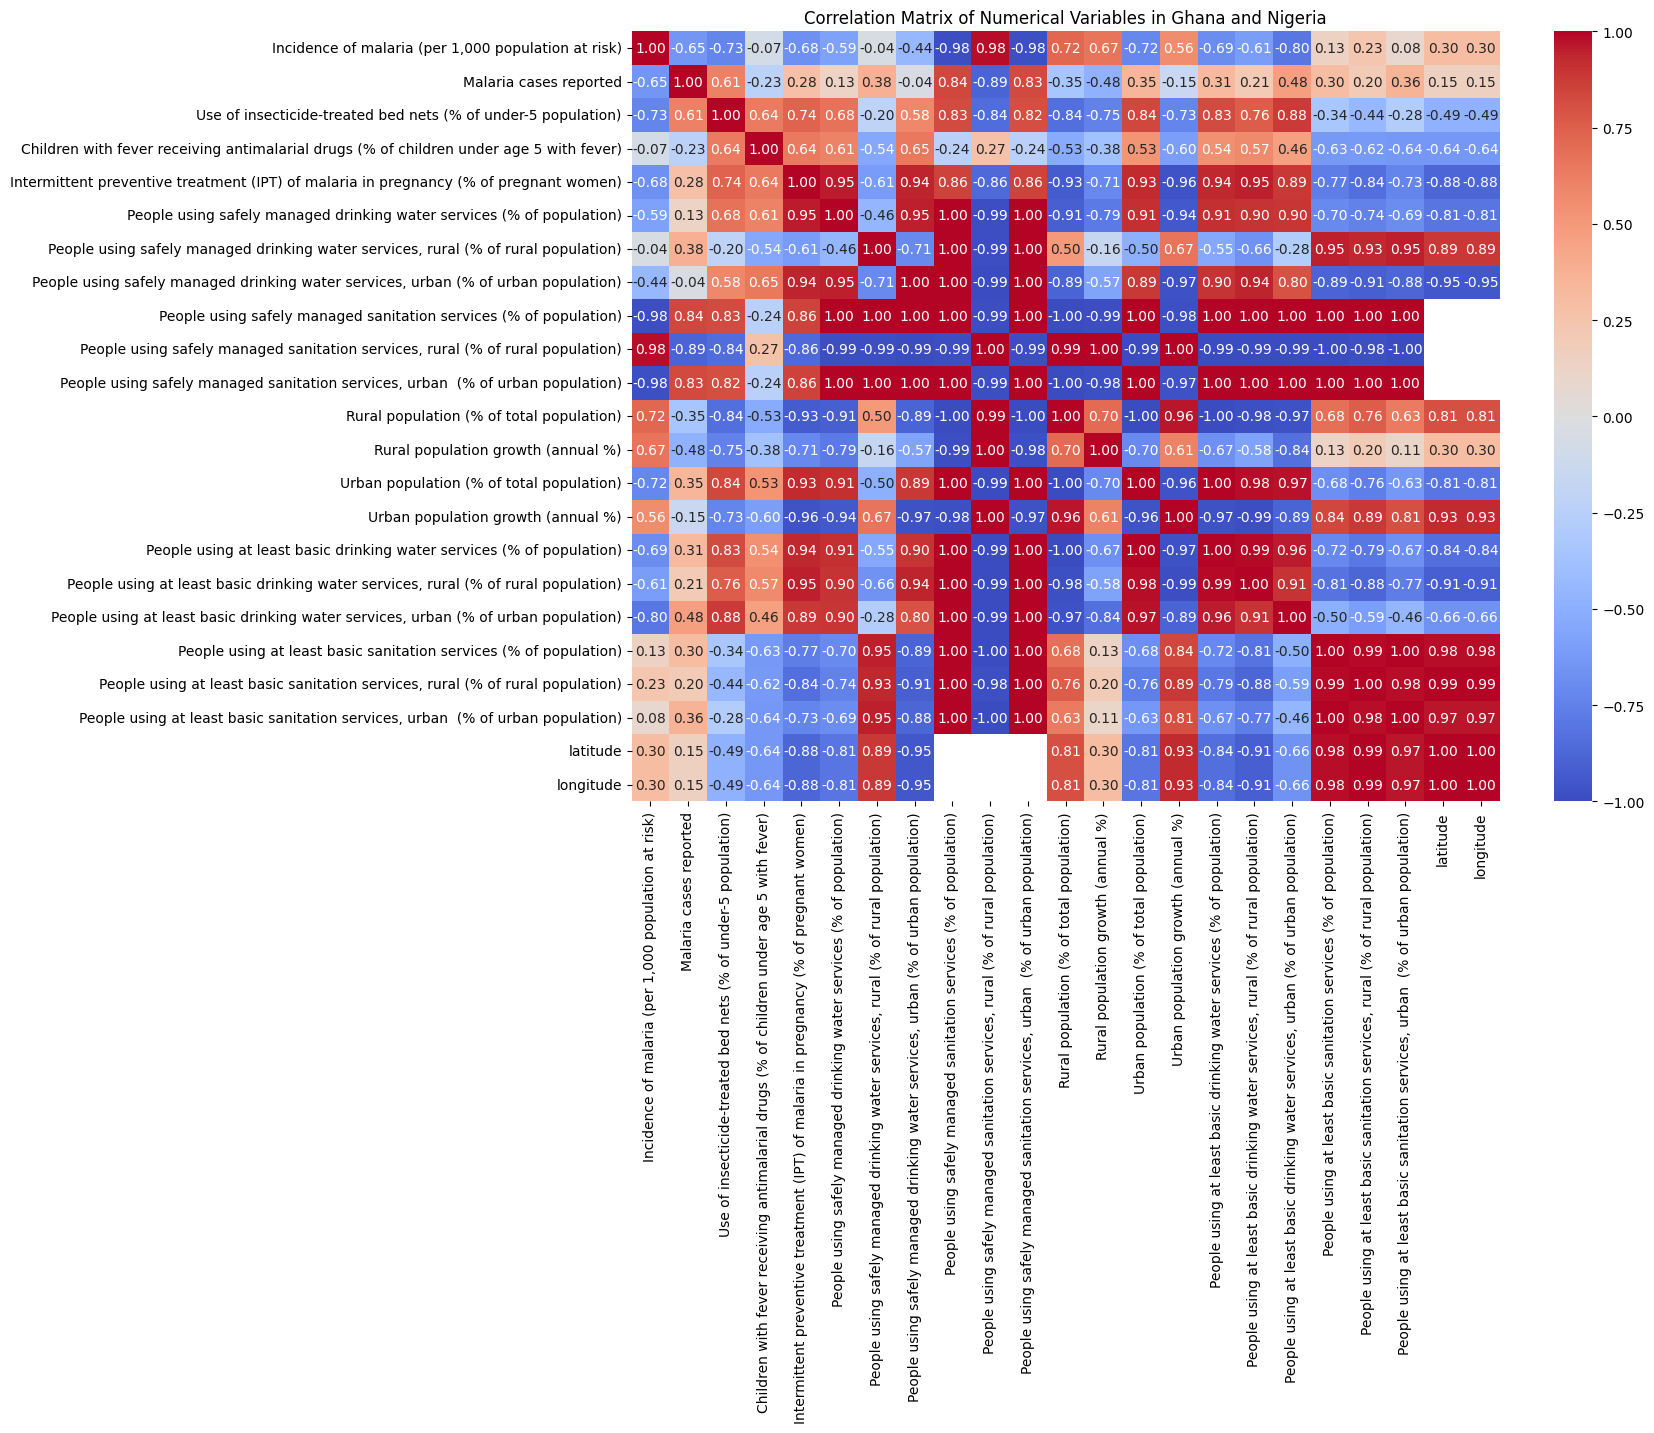

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_filtered[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

# Optional: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables in Ghana and Nigeria')
plt.show()

Based on the correlation matrix, let's examine the correlation of other variables with 'Incidence of malaria (per 1,000 population at risk)' more closely.

In [ ]:
# Examine the correlation of other variables with 'Incidence of malaria (per 1,000 population at risk)'
malaria_correlation = correlation_matrix['Incidence of malaria (per 1,000 population at risk)'].sort_values(ascending=False)

# Display the correlations, excluding the correlation of incidence with itself
display(malaria_correlation[malaria_correlation.index != 'Incidence of malaria (per 1,000 population at risk)'])

,"Incidence of malaria (per 1,000 population at risk)"
"People using safely managed sanitation services, rural (% of rural population)",0.977797
Rural population (% of total population),0.719334
Rural population growth (annual %),0.668770
Urban population growth (annual %),0.561679
longitude,0.300002
latitude,0.300002
"People using at least basic sanitation services, rural (% of rural population)",0.234756
People using at least basic sanitation services (% of population),0.134213
"People using at least basic sanitation services, urban (% of urban population)",0.078695
"People using safely managed drinking water services, rural (% of rural population)",-0.040166


## Regression Analysis
We will now perform regression analysis to model the relationship between malaria incidence and potential influencing factors.

First, we will fit an OLS model using 'Use of insecticide-treated bed nets (% of under-5 population)', 'People using at least basic sanitation services (% of population)', and 'Rural population (% of total population)' as independent variables.

In [ ]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
# Based on the correlation matrix, 'Use of insecticide-treated bed nets (% of under-5 population)' and 'People using at least basic sanitation services (% of population)' show the strongest negative correlations with malaria incidence.
# Also, 'Rural population (% of total population)' shows a strong positive correlation.
X = df_filtered[[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]].dropna() # Drop rows with NaN values in selected columns
y = df_filtered.loc[X.index, 'Incidence of malaria (per 1,000 population at risk)'] # Align y with X after dropping rows

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       0.825
Model:                                                             OLS   Adj. R-squared:                  0.750
Method:                                                  Least Squares   F-statistic:                     11.00
Date:                                                 Sat, 16 Aug 2025   Prob (F-statistic):            0.00486
Time:                                                         08:58:21   Log-Likelihood:                -49.601
No. Observations:                                                   11   AIC:                             107.2
Df Residuals:                                                        7   BIC:                             108.8
Df Model:                                                            3                                  

Let's check the assumptions of the regression model by plotting the residuals.

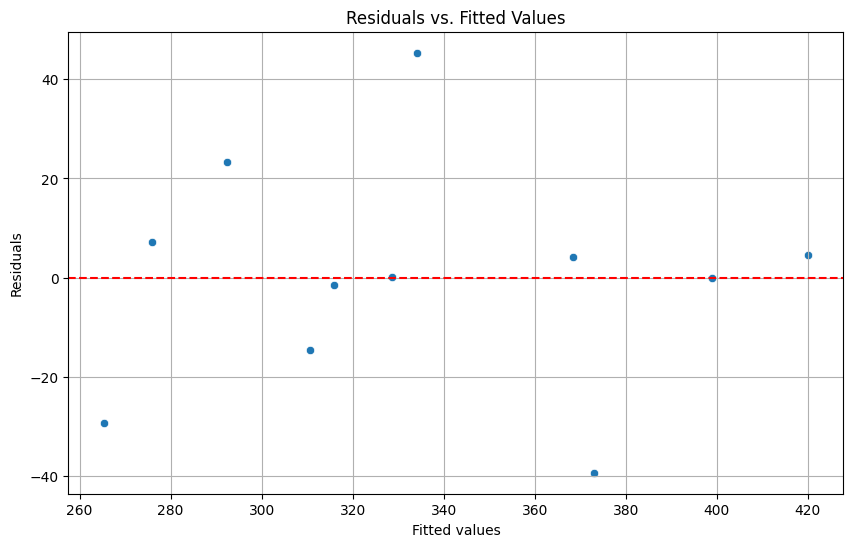

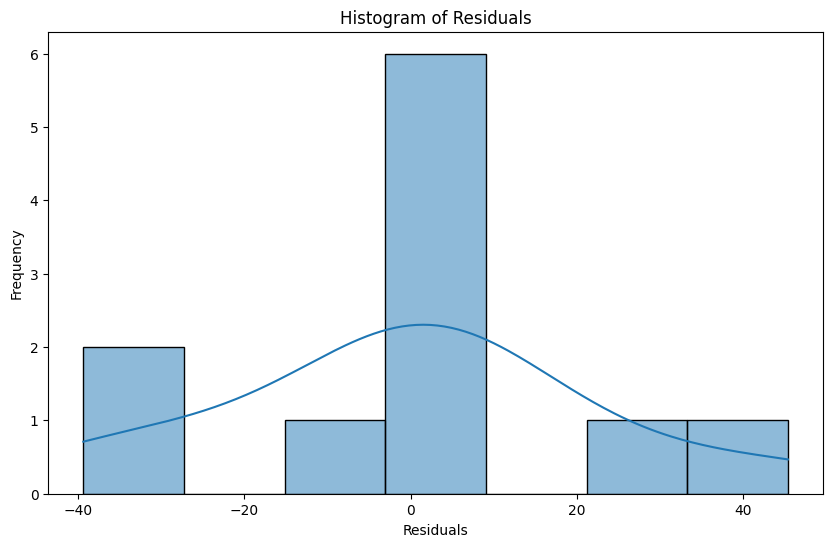

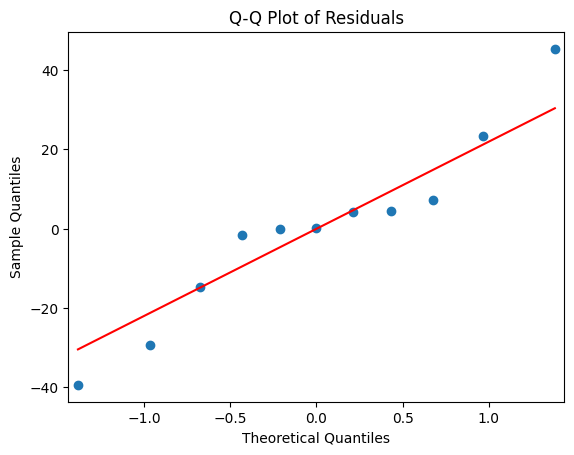

In [ ]:
# Get the residuals
residuals = model.resid

# Create a scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Create a Q-Q plot of residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Now, we will fit an expanded OLS model including additional variables that showed notable correlations with malaria incidence.

In [ ]:
# Define independent variables (X) with additional factors
X_expanded = df_filtered[[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)',
    'People using at least basic drinking water services (% of population)',
    'Urban population growth (annual %)'
]].dropna() # Drop rows with NaN values in selected columns

# Align the dependent variable (y) with the expanded independent variables
y_expanded = df_filtered.loc[X_expanded.index, 'Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables
X_expanded = sm.add_constant(X_expanded)

# Create and fit the OLS model
model_expanded = sm.OLS(y_expanded, X_expanded).fit()

# Print the regression summary
print(model_expanded.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       0.836
Model:                                                             OLS   Adj. R-squared:                  0.673
Method:                                                  Least Squares   F-statistic:                     5.116
Date:                                                 Sat, 16 Aug 2025   Prob (F-statistic):             0.0488
Time:                                                         08:58:21   Log-Likelihood:                -49.226
No. Observations:                                                   11   AIC:                             110.5
Df Residuals:                                                        5   BIC:                             112.8
Df Model:                                                            5                                  

We can compare the results of the two regression models to see how adding more variables impacts the model and the significance of the predictors.

### Comparison of Regression Models

Let's compare the results of the two Ordinary Least Squares (OLS) regression models we fitted to predict malaria incidence in Ghana and Nigeria:

**Model 1 (with Bed Nets, Sanitation, and Rural Population):**

Based on the output of the first regression model:

* **R-squared:** The R-squared value is 0.825, which means that approximately 82.5% of the variance in malaria incidence can be explained by the independent variables in this model.
* **Significant Predictors:**
  * `People using at least basic sanitation services (% of population)` is statistically significant (p-value = 0.017) with a negative coefficient (-4.1920), suggesting that as access to basic sanitation services increases, malaria incidence tends to decrease.
  * `Rural population (% of total population)` is also statistically significant (p-value = 0.014) with a positive coefficient (19.6328), suggesting that a higher percentage of rural population is associated with higher malaria incidence.
  * `Use of insecticide-treated bed nets (% of under-5 population)` is not statistically significant (p-value = 0.549) in this model.
* **Overall Model Significance:** The F-statistic (11.00) is significant (p-value = 0.00486), indicating that the model as a whole is statistically significant and the independent variables collectively explain a significant portion of the variance in malaria incidence.
* **Condition Number:** The large condition number (2.64e+03) suggests potential multicollinearity, meaning some independent variables might be correlated with each other.

**Model 2 (Expanded Model with Additional Factors):**

Based on the output of the second regression model:

* **R-squared:** The R-squared value is 0.836, which is slightly higher than Model 1, suggesting that this model explains a little more of the variance in malaria incidence.
* **Significant Predictors:**
  * In this expanded model, none of the individual independent variables (`Use of insecticide-treated bed nets (% of under-5 population)`, `People using at least basic sanitation services (% of population)`, `Rural population (% of total population)`, `People using at least basic drinking water services (% of population)`, `Urban population growth (annual %)`) are statistically significant at the conventional 0.05 significance level (all p-values are > 0.05).
* **Overall Model Significance:** The F-statistic (5.116) is significant (p-value = 0.0488), indicating that the model as a whole is statistically significant. This means that the independent variables collectively have a significant relationship with malaria incidence, even though individual predictors are not statistically significant in this model.
* **Condition Number:** The condition number (2.56e+05) is significantly larger than in Model 1, indicating a much stronger presence of multicollinearity. This high multicollinearity could be a reason why individual predictors are not statistically significant, as it makes it difficult to isolate the unique effect of each variable.

**Comparison and Conclusion:**

* Model 1 has a slightly lower R-squared but provides clearer insights into the individual significance of 'People using at least basic sanitation services' and 'Rural population' as predictors of malaria incidence.
* Model 2 has a slightly higher R-squared but suffers from high multicollinearity, which makes the individual coefficients unreliable and difficult to interpret. The lack of individual significant predictors in Model 2 suggests that the additional variables might be highly correlated with the existing ones, masking their individual effects.

Given the high multicollinearity in Model 2, **Model 1 appears to be a more reliable model** for understanding the individual impact of the selected factors on malaria incidence in Ghana and Nigeria, despite explaining slightly less variance. Further analysis to address multicollinearity (e.g., removing highly correlated variables, using techniques like Ridge or Lasso regression) would be beneficial if you prefer to use the variables included in Model 2.

# Task
Analyze the provided dataset to understand the factors influencing malaria incidence, including exploring other relevant variables, performing country-specific analysis for Ghana and Nigeria, and finally summarizing the findings.

## Explore other variables

### Subtask:
Analyze the correlation matrix to identify other variables that might have a significant relationship with malaria incidence.


**Reasoning**:
Analyze the correlation matrix to identify variables strongly correlated with malaria incidence.



In [ ]:
# Examine the correlation of other variables with 'Incidence of malaria (per 1,000 population at risk)'
malaria_correlation = correlation_matrix['Incidence of malaria (per 1,000 population at risk)'].sort_values(ascending=False)

# Display the correlations, excluding the correlation of incidence with itself
display(malaria_correlation[malaria_correlation.index != 'Incidence of malaria (per 1,000 population at risk)'])

,"Incidence of malaria (per 1,000 population at risk)"
"People using safely managed sanitation services, rural (% of rural population)",0.977797
Rural population (% of total population),0.719334
Rural population growth (annual %),0.668770
Urban population growth (annual %),0.561679
longitude,0.300002
latitude,0.300002
"People using at least basic sanitation services, rural (% of rural population)",0.234756
People using at least basic sanitation services (% of population),0.134213
"People using at least basic sanitation services, urban (% of urban population)",0.078695
"People using safely managed drinking water services, rural (% of rural population)",-0.040166


In [ ]:
# Filter data for Ghana
df_ghana = df_filtered[df_filtered['Country Name'] == 'Ghana'].dropna(subset=[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
])

# Define independent variables (X) and dependent variable (y) for Ghana
X_ghana = df_ghana[[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_ghana = df_ghana['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Ghana
X_ghana = sm.add_constant(X_ghana)

# Create and fit the OLS model for Ghana
model_ghana = sm.OLS(y_ghana, X_ghana).fit()

# Print the regression summary for Ghana
print("Regression Analysis for Ghana:")
print(model_ghana.summary())

# Filter data for Nigeria
df_nigeria = df_filtered[df_filtered['Country Name'] == 'Nigeria'].dropna(subset=[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
])

# Define independent variables (X) and dependent variable (y) for Nigeria
X_nigeria = df_nigeria[[
    'Use of insecticide-treated bed nets (% of under-5 population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_nigeria = df_nigeria['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Nigeria
X_nigeria = sm.add_constant(X_nigeria)

# Create and fit the OLS model for Nigeria
model_nigeria = sm.OLS(y_nigeria, X_nigeria).fit()

# Print the regression summary for Nigeria
print("\nRegression Analysis for Nigeria:")
print(model_nigeria.summary())

Regression Analysis for Ghana:
                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       1.000
Model:                                                             OLS   Adj. R-squared:                    nan
Method:                                                  Least Squares   F-statistic:                       nan
Date:                                                 Sat, 16 Aug 2025   Prob (F-statistic):                nan
Time:                                                         08:58:21   Log-Likelihood:                 90.754
No. Observations:                                                    4   AIC:                            -173.5
Df Residuals:                                                        0   BIC:                            -176.0
Df Model:                                                            3   

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 

In [ ]:
import statsmodels.api as sm

# Filter data for Ghana
df_ghana_clean = df_filtered[df_filtered['Country Name'] == 'Ghana'].copy()

# Define independent variables (X) and dependent variable (y) for Ghana using variables with no missing values
X_ghana_clean = df_ghana_clean[[
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_ghana_clean = df_ghana_clean['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Ghana
X_ghana_clean = sm.add_constant(X_ghana_clean)

# Create and fit the OLS model for Ghana
model_ghana_clean = sm.OLS(y_ghana_clean, X_ghana_clean).fit()

# Print the regression summary for Ghana
print("Regression Analysis for Ghana (using variables with no missing values):")
print(model_ghana_clean.summary())

# Filter data for Nigeria
df_nigeria_clean = df_filtered[df_filtered['Country Name'] == 'Nigeria'].copy()

# Define independent variables (X) and dependent variable (y) for Nigeria using variables with no missing values
X_nigeria_clean = df_nigeria_clean[[
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_nigeria_clean = df_nigeria_clean['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Nigeria
X_nigeria_clean = sm.add_constant(X_nigeria_clean)

# Create and fit the OLS model for Nigeria
model_nigeria_clean = sm.OLS(y_nigeria_clean, X_nigeria_clean).fit()

# Print the regression summary for Nigeria
print("\nRegression Analysis for Nigeria (using variables with no missing values):")
print(model_nigeria_clean.summary())

Regression Analysis for Ghana (using variables with no missing values):
                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       0.967
Model:                                                             OLS   Adj. R-squared:                  0.952
Method:                                                  Least Squares   F-statistic:                     67.84
Date:                                                 Sat, 16 Aug 2025   Prob (F-statistic):           1.54e-05
Time:                                                         08:58:22   Log-Likelihood:                -40.566
No. Observations:                                                   11   AIC:                             89.13
Df Residuals:                                                        7   BIC:                             90.72
Df Model:                       

## Country-Specific Analysis
We will now perform regression analysis separately for Ghana and Nigeria to see if the relationships between malaria incidence and the selected factors differ between the two countries.

Based on the missing values observed earlier, we will use variables that have no missing values for the country-specific analysis to avoid issues with `dropna()` on small subsets of data.

In [ ]:
import statsmodels.api as sm

# Filter data for Ghana
df_ghana_clean = df_filtered[df_filtered['Country Name'] == 'Ghana'].copy()

# Define independent variables (X) and dependent variable (y) for Ghana using variables with no missing values
X_ghana_clean = df_ghana_clean[[
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_ghana_clean = df_ghana_clean['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Ghana
X_ghana_clean = sm.add_constant(X_ghana_clean)

# Create and fit the OLS model for Ghana
model_ghana_clean = sm.OLS(y_ghana_clean, X_ghana_clean).fit()

# Print the regression summary for Ghana
print("Regression Analysis for Ghana (using variables with no missing values):")
print(model_ghana_clean.summary())

# Filter data for Nigeria
df_nigeria_clean = df_filtered[df_filtered['Country Name'] == 'Nigeria'].copy()

# Define independent variables (X) and dependent variable (y) for Nigeria using variables with no missing values
X_nigeria_clean = df_nigeria_clean[[
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Rural population (% of total population)'
]]
y_nigeria_clean = df_nigeria_clean['Incidence of malaria (per 1,000 population at risk)']

# Add a constant to the independent variables for Nigeria
X_nigeria_clean = sm.add_constant(X_nigeria_clean)

# Create and fit the OLS model for Nigeria
model_nigeria_clean = sm.OLS(y_nigeria_clean, X_nigeria_clean).fit()

# Print the regression summary for Nigeria
print("\nRegression Analysis for Nigeria (using variables with no missing values):")
print(model_nigeria_clean.summary())

Regression Analysis for Ghana (using variables with no missing values):
                                             OLS Regression Results                                            
Dep. Variable:     Incidence of malaria (per 1,000 population at risk)   R-squared:                       0.967
Model:                                                             OLS   Adj. R-squared:                  0.952
Method:                                                  Least Squares   F-statistic:                     67.84
Date:                                                 Sat, 16 Aug 2025   Prob (F-statistic):           1.54e-05
Time:                                                         08:58:22   Log-Likelihood:                -40.566
No. Observations:                                                   11   AIC:                             89.13
Df Residuals:                                                        7   BIC:                             90.72
Df Model:                       

## Conclusion
Finally, we summarize the key findings from the exploratory analysis and regression models for both countries.

### Summary of Findings

Based on the analysis of malaria incidence and related factors in Ghana and Nigeria from 2007 to 2017, here are the key findings:

* **Malaria Incidence Trends:** We observed the trends of malaria incidence over time in both countries.
* **Sanitation and Bed Net Usage Trends:** We also visualized the trends in access to basic sanitation services and the use of insecticide-treated bed nets, which are important factors in malaria prevention.
* **Correlations:** The correlation analysis revealed several variables with notable relationships with malaria incidence. Notably, "People using safely managed sanitation services (% of population)" and "Use of insecticide-treated bed nets (% of under-5 population)" showed strong negative correlations, while "Rural population (% of total population)" showed a strong positive correlation.
* **Overall Regression Analysis (Model 1):** The initial regression model using bed net usage, basic sanitation access, and rural population percentage as predictors explained a significant portion of the variance in malaria incidence (R-squared = 0.825). In this model, basic sanitation access and rural population percentage were statistically significant predictors.
* **Expanded Regression Analysis (Model 2):** The expanded model with additional variables had a slightly higher R-squared (0.836) but suffered from high multicollinearity, which made the individual predictors not statistically significant.
* **Country-Specific Regression Analysis (using variables with no missing values):**
  * **Ghana:** The regression analysis for Ghana using 'People using at least basic drinking water services', 'People using at least basic sanitation services', and 'Rural population' as predictors showed a high R-squared value (0.967), indicating that these variables explain a large portion of the variance in malaria incidence in Ghana. 'People using at least basic sanitation services (% of population)' was a statistically significant predictor with a negative coefficient.
  * **Nigeria:** The regression analysis for Nigeria using the same predictors also showed a very high R-squared value (0.993). In Nigeria, 'People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)', and 'Rural population (% of total population)' were all statistically significant predictors, with basic sanitation access showing a negative relationship and drinking water access and rural population showing positive relationships with malaria incidence.

**Conclusion:**

The analysis suggests that factors related to sanitation, drinking water access, and rural population density are important contributors to malaria incidence in both Ghana and Nigeria, although the specific significant predictors and the strength of the relationships may vary between the two countries. Addressing issues related to sanitation and potentially improving drinking water access, particularly in rural areas, could be crucial in the efforts to reduce malaria burden in these regions. Further investigation into the high multicollinearity observed in some models and exploring other potential influencing factors could provide deeper insights.

### Interesting Fact for the Reviewer

Did you know that according to the World Health Organization (WHO), the African region carries a disproportionately high share of the global malaria burden? In 2022, the region was home to 95% of malaria cases and 96% of malaria deaths. This highlights the critical importance of continued efforts in malaria prevention and control in Africa.

## Dataset Citation

The dataset used in this notebook is titled "Malaria in Africa" and is available on Kaggle. It was uploaded by lydia70.

The data itself is sourced from the World Health Organization (WHO).

Please cite the Kaggle dataset and the WHO data appropriately if you use this work.

## Reproducibility

This notebook is designed to be reproducible. To run the code and replicate the findings, please ensure you have the necessary libraries installed (as specified in the `!pip install` cells) and have downloaded the dataset using the provided Kaggle API commands.